In [175]:
# !pip install --upgrade seaborn

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 경로 지정
font_path = "c:/Windows/Fonts/malgun.ttf"  # 윈도우에 설치된 맑은 고딕 폰트 경로

# 폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 기능을 이용하여 글꼴 설정
mpl.rc('font', family=font_name)

# 유니코드에서  음수 부호 설정
mpl.rc('axes', unicode_minus=False)

path='../data/Paris/listings.csv'
raw = pd.read_csv(path)
df = raw.copy()

df = df[['id', 'host_id','host_is_superhost',
        'host_total_listings_count','neighbourhood_cleansed','room_type','accommodates','bathrooms','bedrooms',
        'beds','amenities','price','minimum_nights','maximum_nights','number_of_reviews', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
        'review_scores_location', 'review_scores_value', 'reviews_per_month','listing_url','property_type','number_of_reviews_ltm','has_availability','last_review']]

df = df.rename(columns= {
    'id': '숙소_id',
    'host_id': '호스트_id',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'neighbourhood_cleansed': '숙소_지역',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    'minimum_nights': '최소_숙박일',
    'maximum_nights': '최대_숙박일',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수',
    'listing_url':'url',
    'property_type':'숙소_특징',
    'number_of_reviews_ltm':'12개월_리뷰수',
    'has_availability':'예약가능여부',
    'last_review':'마지막_리뷰'
})


# 슈퍼호스트, 리뷰수 결측치 제거
print(f"처음 df : {len(df)}")
df = df[~df['슈퍼호스트'].isnull()]
print(f"슈퍼호스트 제거 : {len(df)}")
df = df[df['리뷰수']>2]
print(f"리뷰수 제거 : {len(df)}")

# 숙소가격 null값 제거
df= df[~df['숙소_가격'].isnull()]

#가격 앞 통화기호 제거
df['숙소_가격'] = df['숙소_가격'].replace('[\$,]', '', regex=True).astype(float)

# 유형 제거 
df = df[(df['숙소_유형']=='Entire home/apt') | (df['숙소_유형']=='Private room')]
print(f"숙소_유형 제거 : {len(df)}")

# 12개월 리뷰수 0 개 제거
df = df[df['12개월_리뷰수']!=0]
print(f"12개월_리뷰수 0개 제거 : {len(df)}")

# 욕실수, 침실수, 침대수 null값 제거
df = df.dropna(subset=['욕실수', '침실수', '침대수'])
print(f"욕실수, 침실수, 침대수 제거 후 : {len(df)}")

# 리뷰  null값 제거
df = df.dropna(subset=['숙소_정확성_리뷰점수','숙소_청결도_리뷰점수','숙소_체크인_리뷰점수','숙소_소통_리뷰점수','숙소_위치_리뷰점수','숙소_가격_리뷰점수'])
print(f"리뷰 결측치 제거 후 : {len(df)}")


# 예약 가능여부 f 버리기
df = df.dropna(subset='예약가능여부')
print(f"예약가능여부 : {len(df)}")

처음 df : 84397
슈퍼호스트 제거 : 84306
리뷰수 제거 : 47841
숙소_유형 제거 : 34280
12개월_리뷰수 0개 제거 : 31052
욕실수, 침실수, 침대수 제거 후 : 30997
리뷰 결측치 제거 후 : 30997
예약가능여부 : 30990


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        30990 non-null  int64  
 1   호스트_id       30990 non-null  int64  
 2   슈퍼호스트        30990 non-null  object 
 3   숙소_수         30990 non-null  float64
 4   숙소_지역        30990 non-null  object 
 5   숙소_유형        30990 non-null  object 
 6   수용_인원수       30990 non-null  int64  
 7   욕실수          30990 non-null  float64
 8   침실수          30990 non-null  float64
 9   침대수          30990 non-null  float64
 10  편의시설         30990 non-null  object 
 11  숙소_가격        30990 non-null  float64
 12  최소_숙박일       30990 non-null  int64  
 13  최대_숙박일       30990 non-null  int64  
 14  리뷰수          30990 non-null  int64  
 15  30일_리뷰수      30990 non-null  int64  
 16  리뷰점수         30990 non-null  float64
 17  숙소_정확성_리뷰점수  30990 non-null  float64
 18  숙소_청결도_리뷰점수  30990 non-null  float64
 19  숙소_체크인_리뷰

In [178]:
df.columns

Index(['숙소_id', '호스트_id', '슈퍼호스트', '숙소_수', '숙소_지역', '숙소_유형', '수용_인원수', '욕실수',
       '침실수', '침대수', '편의시설', '숙소_가격', '최소_숙박일', '최대_숙박일', '리뷰수', '30일_리뷰수',
       '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수',
       '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수', 'url', '숙소_특징', '12개월_리뷰수',
       '예약가능여부', '마지막_리뷰'],
      dtype='object')

PCA 전 상관계수 확인

In [179]:
# 상관계수에 불필요한 컬럼들 제거
df_clean = df.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설','예약가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징'])


In [180]:
df_clean.head(3)

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
1,1.0,2,1.0,0.0,1.0,140.0,3,365,106,0,4.68,4.72,4.59,4.87,4.89,4.95,4.74,0.69,14
2,3.0,2,1.0,0.0,1.0,107.0,1,1125,393,5,4.60,4.63,4.57,4.81,4.84,4.96,4.58,2.19,61
3,3.0,4,1.0,1.0,1.0,200.0,2,120,78,0,4.56,4.74,4.37,4.82,4.79,4.65,4.48,0.51,1


In [181]:
df_clean.corr()

,숙소_수,수용_인원수,욕실수,침실수,침대수,숙소_가격,최소_숙박일,최대_숙박일,리뷰수,30일_리뷰수,리뷰점수,숙소_정확성_리뷰점수,숙소_청결도_리뷰점수,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,12개월_리뷰수
숙소_수,1.000000,0.072397,0.050807,0.021303,0.049705,0.011811,0.045499,0.160765,-0.034157,0.004186,-0.173307,-0.156177,-0.112109,-0.178036,-0.205230,-0.047641,-0.180827,-0.013471,-0.027291
수용_인원수,0.072397,1.000000,0.513838,0.672141,0.785599,0.199352,-0.062471,0.092453,0.027002,0.027205,-0.034344,-0.052515,-0.012051,-0.054547,-0.065996,-0.002695,-0.029298,0.042294,0.043512
욕실수,0.050807,0.513838,1.000000,0.606889,0.591580,0.173193,-0.028125,0.046594,0.007708,0.001909,0.043394,0.017499,0.061316,0.005065,0.000568,0.047160,0.042952,0.000156,0.004324
침실수,0.021303,0.672141,0.606889,1.000000,0.684795,0.174294,-0.057804,0.017404,-0.013044,-0.046988,0.068411,0.040126,0.056208,0.022338,0.021765,0.036801,0.071324,-0.048063,-0.027215
침대수,0.049705,0.785599,0.591580,0.684795,1.000000,0.167432,-0.033170,0.075789,0.047605,-0.002578,-0.016561,-0.035059,0.000239,-0.028985,-0.044119,0.012420,-0.007547,-0.001328,0.030924
숙소_가격,0.011811,0.199352,0.173193,0.174294,0.167432,1.000000,-0.007831,0.021544,-0.017450,-0.041527,0.026149,0.015281,0.040438,-0.004023,-0.014240,0.050457,0.023783,-0.038569,-0.027269
최소_숙박일,0.045499,-0.062471,-0.028125,-0.057804,-0.033170,-0.007831,1.000000,0.040583,-0.038752,-0.080922,-0.020439,-0.014411,-0.032201,-0.011889,-0.038871,0.015540,-0.036298,-0.128229,-0.106775
최대_숙박일,0.160765,0.092453,0.046594,0.017404,0.075789,0.021544,0.040583,1.000000,0.111279,0.026920,-0.106666,-0.087671,-0.069213,-0.096181,-0.114485,-0.025553,-0.102741,0.018674,0.056114
리뷰수,-0.034157,0.027002,0.007708,-0.013044,0.047605,-0.017450,-0.038752,0.111279,1.000000,0.343425,-0.012064,0.028203,0.044912,0.045389,0.026239,0.036649,0.038100,0.455391,0.674146
30일_리뷰수,0.004186,0.027205,0.001909,-0.046988,-0.002578,-0.041527,-0.080922,0.026920,0.343425,1.000000,-0.000268,-0.004559,0.054415,0.019218,0.017492,0.016562,0.019042,0.707330,0.586650


In [182]:
df_clean_corr = df_clean.corr()

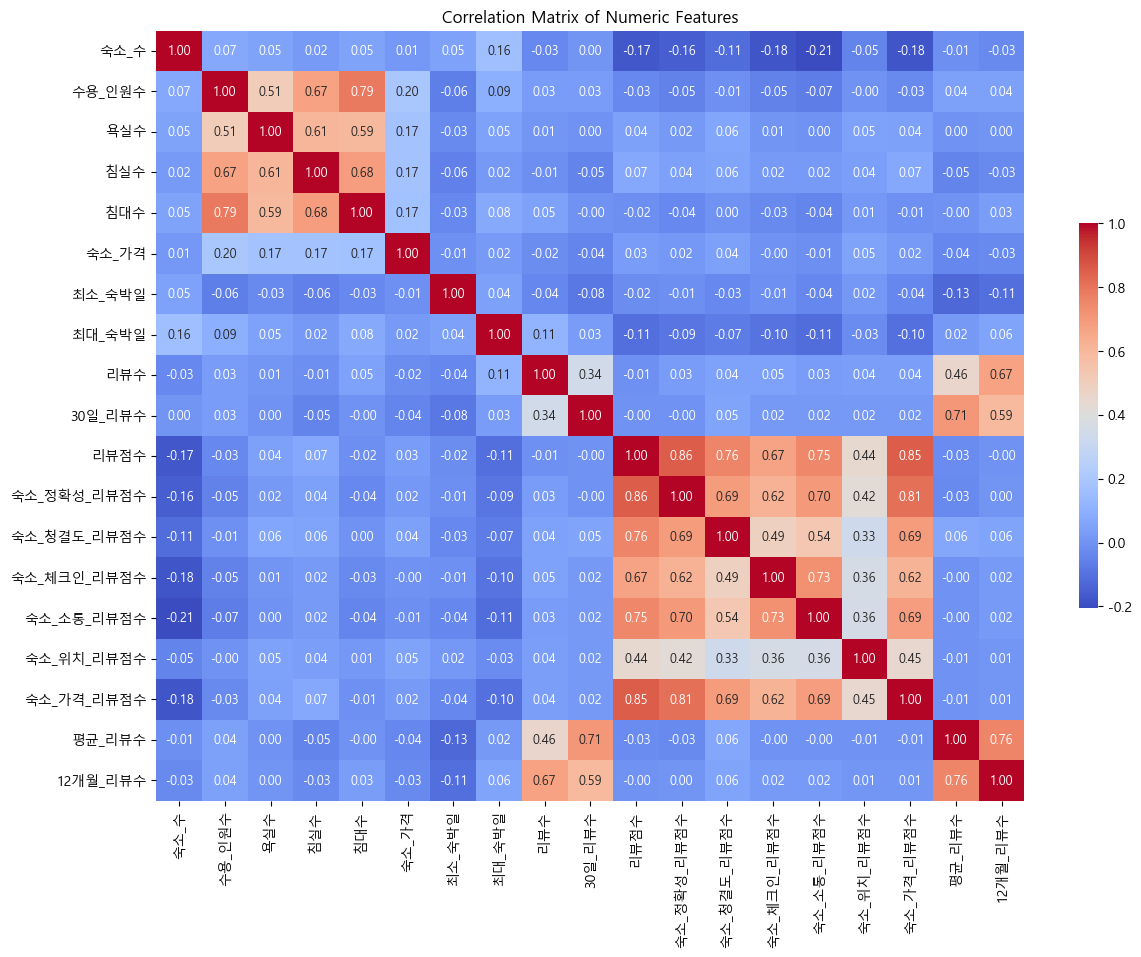

In [183]:
# 히트맵 
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.5}, annot_kws={'size': 9})
plt.title('Correlation Matrix of Numeric Features')

plt.show()

좋은 숙소 기준 : 게스트 선호
 - 평점 4.9이상
 - 2년간 리뷰수 5개 이상
 - 예약_취소율 1%미만 -> 슈퍼호스트 여부로 대체 가능

In [184]:
df[(df['리뷰점수'] >= 4.9) & (df['리뷰수'] >= 5) & (df['슈퍼호스트'] == 't')]

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용_인원수,욕실수,침실수,침대수,...,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url,숙소_특징,12개월_리뷰수,예약가능여부,마지막_리뷰
27,9952,33534,t,1.0,Popincourt,Entire home/apt,2,1.0,1.0,1.0,...,4.98,4.86,4.88,4.90,0.37,https://www.airbnb.com/rooms/9952,Entire rental unit,7,t,2023-09-24
45,195564,938912,t,1.0,Gobelins,Entire home/apt,3,1.0,1.0,2.0,...,4.98,5.00,4.83,4.83,0.47,https://www.airbnb.com/rooms/195564,Entire rental unit,5,t,2023-07-07
48,54377,247562,t,3.0,Buttes-Montmartre,Entire home/apt,4,1.0,1.0,1.0,...,4.98,5.00,4.53,4.88,1.30,https://www.airbnb.com/rooms/54377,Entire rental unit,35,t,2024-01-03
53,55348,261355,t,7.0,Hôtel-de-Ville,Entire home/apt,2,1.0,0.0,1.0,...,4.91,4.94,4.98,4.85,0.93,https://www.airbnb.com/rooms/55348,Entire rental unit,25,t,2024-02-29
73,16626,64627,t,3.0,Luxembourg,Private room,4,1.5,1.0,2.0,...,4.83,4.85,4.98,4.80,0.88,https://www.airbnb.com/rooms/16626,Private room in rental unit,23,t,2024-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77625,1077678541993753725,33676510,t,2.0,Entrepôt,Entire home/apt,2,1.0,1.0,2.0,...,5.00,5.00,4.80,5.00,4.41,https://www.airbnb.com/rooms/1077678541993753725,Entire rental unit,5,t,2024-03-10
78171,1079775036826711802,14267686,t,1.0,Observatoire,Private room,2,1.5,1.0,1.0,...,5.00,4.92,4.92,4.83,8.78,https://www.airbnb.com/rooms/1079775036826711802,Private room in rental unit,12,t,2024-03-16
78192,1080250485815449505,242694272,t,3.0,Buttes-Montmartre,Entire home/apt,4,1.5,2.0,2.0,...,5.00,5.00,5.00,5.00,6.00,https://www.airbnb.com/rooms/1080250485815449505,Entire rental unit,7,t,2024-03-16
78307,1080943945230018972,33985517,t,46.0,Opéra,Entire home/apt,6,3.5,3.0,3.0,...,5.00,5.00,5.00,4.80,3.41,https://www.airbnb.com/rooms/1080943945230018972,Entire rental unit,5,t,2024-03-12


해당 조건에 들어가는 데이터 개수 : 4716개

In [185]:
df_guest_prefer= df[(df['리뷰점수'] >= 4.9) & (df['리뷰수'] >= 5) & (df['슈퍼호스트'] == 't')]
df_guest_prefer.head()

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용_인원수,욕실수,침실수,침대수,...,숙소_체크인_리뷰점수,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url,숙소_특징,12개월_리뷰수,예약가능여부,마지막_리뷰
27,9952,33534,t,1.0,Popincourt,Entire home/apt,2,1.0,1.0,1.0,...,4.98,4.86,4.88,4.90,0.37,https://www.airbnb.com/rooms/9952,Entire rental unit,7,t,2023-09-24
45,195564,938912,t,1.0,Gobelins,Entire home/apt,3,1.0,1.0,2.0,...,4.98,5.00,4.83,4.83,0.47,https://www.airbnb.com/rooms/195564,Entire rental unit,5,t,2023-07-07
48,54377,247562,t,3.0,Buttes-Montmartre,Entire home/apt,4,1.0,1.0,1.0,...,4.98,5.00,4.53,4.88,1.30,https://www.airbnb.com/rooms/54377,Entire rental unit,35,t,2024-01-03
53,55348,261355,t,7.0,Hôtel-de-Ville,Entire home/apt,2,1.0,0.0,1.0,...,4.91,4.94,4.98,4.85,0.93,https://www.airbnb.com/rooms/55348,Entire rental unit,25,t,2024-02-29
73,16626,64627,t,3.0,Luxembourg,Private room,4,1.5,1.0,2.0,...,4.83,4.85,4.98,4.80,0.88,https://www.airbnb.com/rooms/16626,Private room in rental unit,23,t,2024-01-28


불필요한 컬럼 삭제

In [186]:
df_guest_prefer.drop(columns=['숙소_id','호스트_id','url','슈퍼호스트','편의시설','예약가능여부','마지막_리뷰'],axis=1, inplace=True)
df_guest_prefer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4716 entries, 27 to 78309
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         4716 non-null   float64
 1   숙소_지역        4716 non-null   object 
 2   숙소_유형        4716 non-null   object 
 3   수용_인원수       4716 non-null   int64  
 4   욕실수          4716 non-null   float64
 5   침실수          4716 non-null   float64
 6   침대수          4716 non-null   float64
 7   숙소_가격        4716 non-null   float64
 8   최소_숙박일       4716 non-null   int64  
 9   최대_숙박일       4716 non-null   int64  
 10  리뷰수          4716 non-null   int64  
 11  30일_리뷰수      4716 non-null   int64  
 12  리뷰점수         4716 non-null   float64
 13  숙소_정확성_리뷰점수  4716 non-null   float64
 14  숙소_청결도_리뷰점수  4716 non-null   float64
 15  숙소_체크인_리뷰점수  4716 non-null   float64
 16  숙소_소통_리뷰점수   4716 non-null   float64
 17  숙소_위치_리뷰점수   4716 non-null   float64
 18  숙소_가격_리뷰점수   4716 non-null   float64
 19  평균_리뷰수   

C:\Users\rladn\AppData\Local\Temp\ipykernel_15496\2688296093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_guest_prefer.drop(columns=['숙소_id','호스트_id','url','슈퍼호스트','편의시설','예약가능여부','마지막_리뷰'],axis=1, inplace=True)


## 게스트 선호에 대한 EDA

숙소_지역, 숙소_유형, 숙소_특징의 분포 시각화

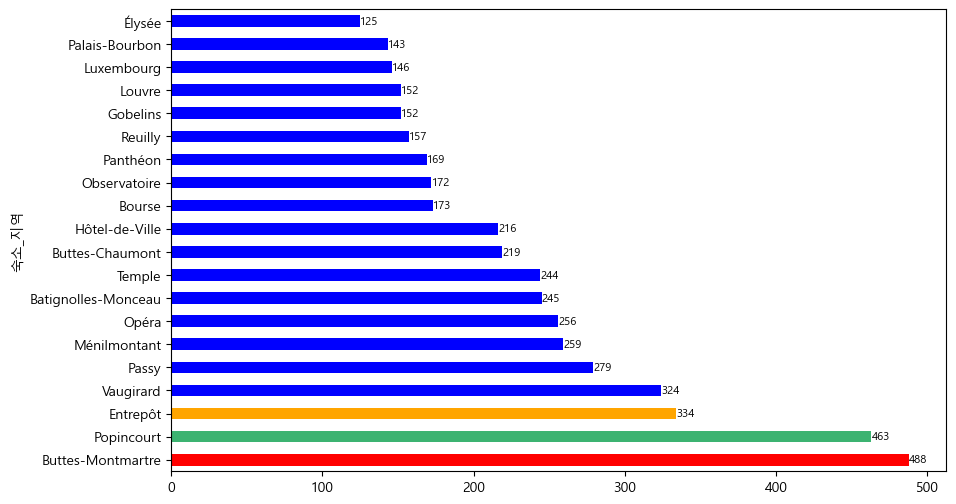

In [187]:
import matplotlib.pyplot as plt

# 숙소_지역별 count 계산
region_count = df_guest_prefer['숙소_지역'].value_counts()

# top 3 지역 추출
top3_regions = region_count.nlargest(3)

# 그래프 그리기
colors = ['r', 'mediumseagreen', 'orange', 'lightblue']  # top 3 지역에 대한 색깔 지정
plt.figure(figsize=(10,6))
region_count.plot(kind='barh', color=[colors[i] if region_count.index[i] in top3_regions.index else 'b' for i in range(len(region_count))])
for i, v in enumerate(region_count):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=8)
plt.show()


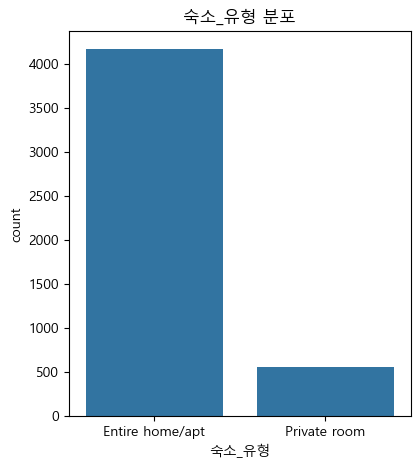

In [188]:
# 숙소_유형 분포 시각화

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
sns.countplot(data=df_guest_prefer, x='숙소_유형')
plt.title('숙소_유형 분포')
plt.show()

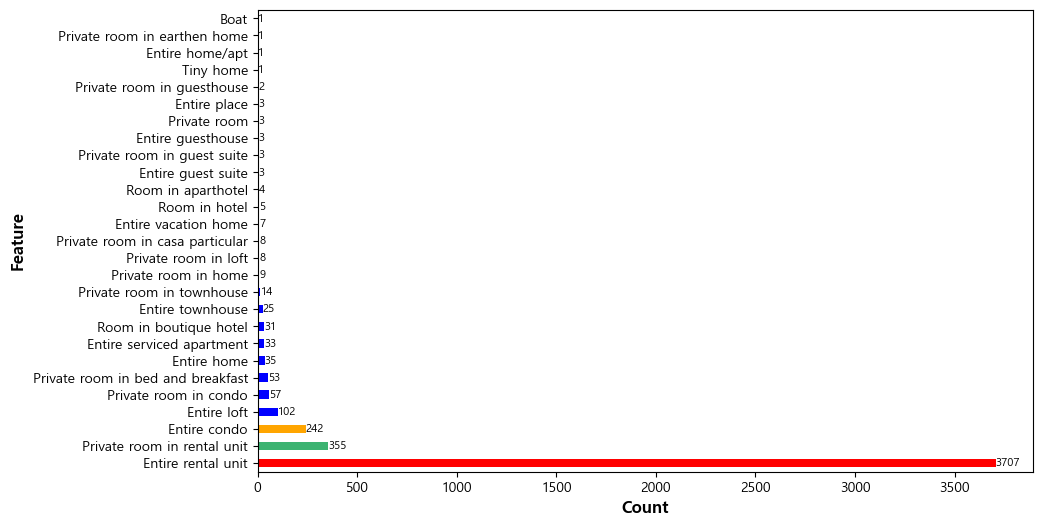

In [189]:
import matplotlib.pyplot as plt

# 숙소_특징별 count 계산
char_count = df_guest_prefer['숙소_특징'].value_counts()

# top 3 특징 추출
top3_char = char_count.nlargest(3)

# 그래프 그리기
colors = ['r', 'mediumseagreen', 'orange', 'lightblue']  # top 3 특징에 대한 색깔 지정
plt.figure(figsize=(10,6))
barplot = char_count.plot(kind='barh', color=[colors[i] if char_count.index[i] in top3_char.index else 'b' for i in range(len(char_count))])
barplot.set_xlabel('Count', fontsize=12, fontweight='bold')  # x축 라벨 설정
barplot.set_ylabel('Feature', fontsize=12, fontweight='bold')  # y축 라벨 설정
for i, v in enumerate(char_count):
    plt.text(v, i, str(v), ha='left', va='center', fontsize=8)

plt.show()

숙소_가격이 숙소_지역,숙소_유형,숙소_특징에 따라 얼마나 다른지 각각 확인

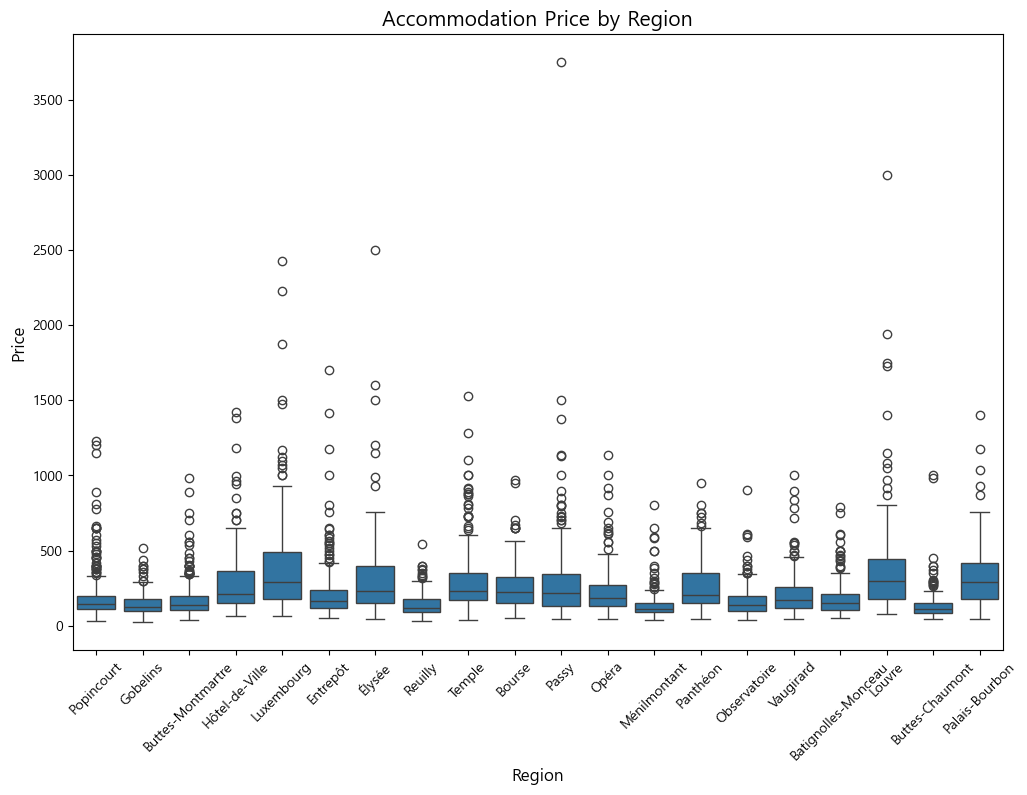

In [190]:
# 숙소_가격과 숙소_지역에 따른 분포
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_guest_prefer, x='숙소_지역', y='숙소_가격')
plt.title('Accommodation Price by Region', fontsize=15)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Passy 지역에 가장 큰 이상치 존재

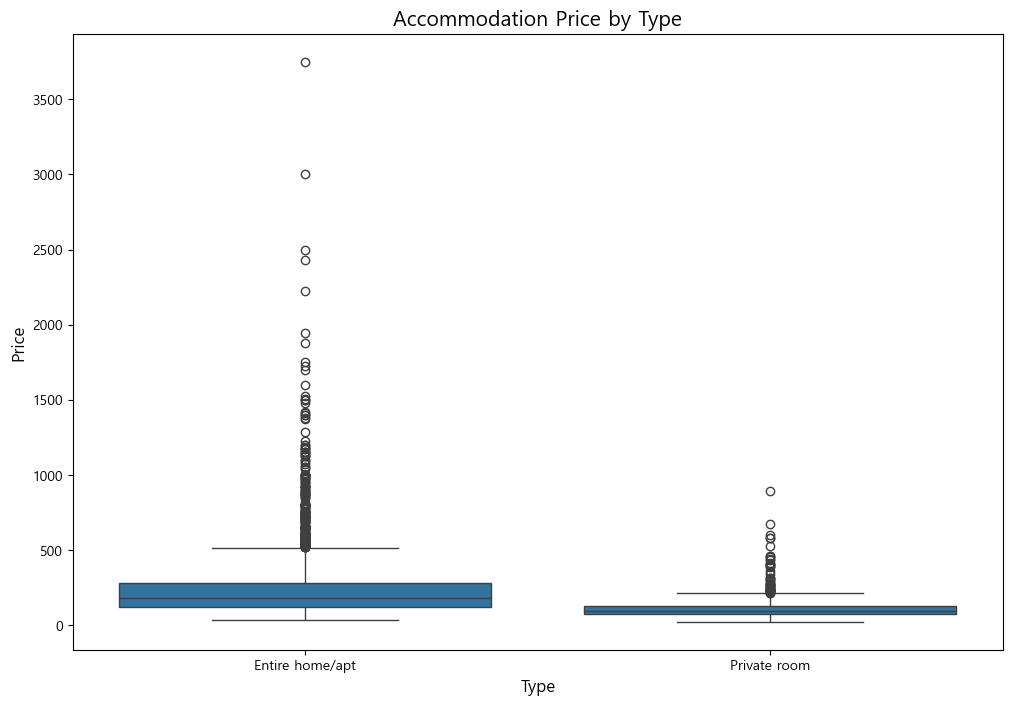

In [191]:
# 숙소_가격과 숙소_유형에 따른 분포
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_guest_prefer, x='숙소_유형', y='숙소_가격')
plt.title('Accommodation Price by Type', fontsize=15)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()


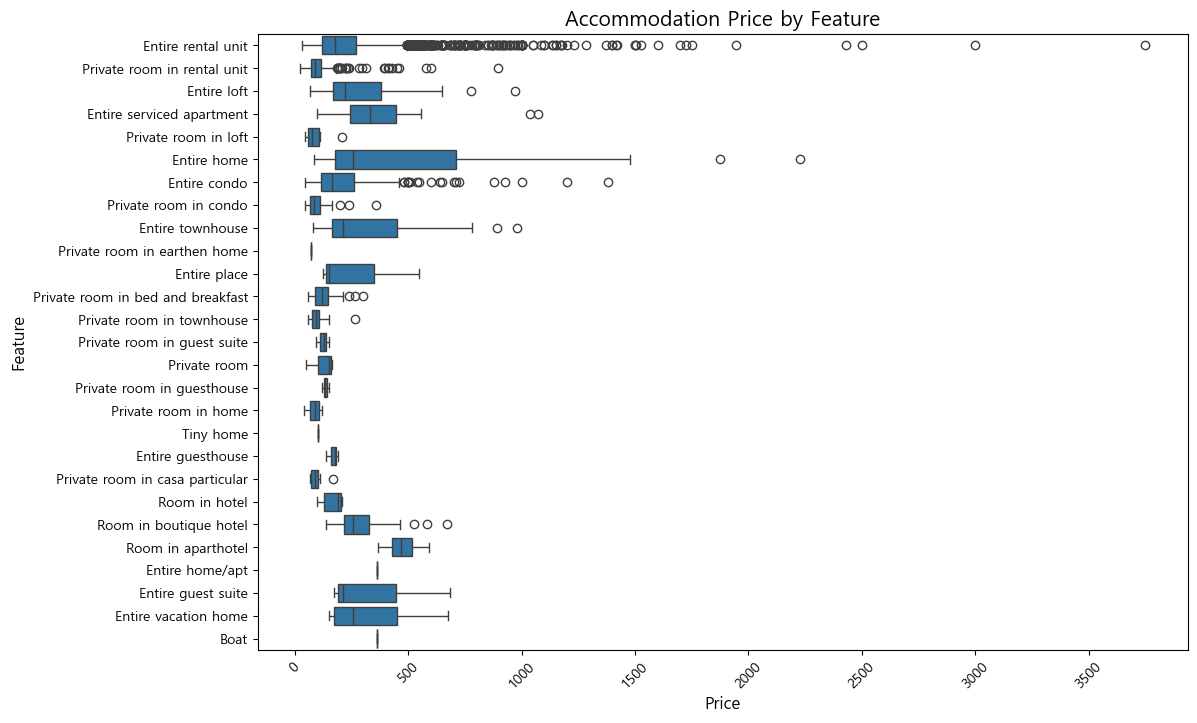

In [192]:
# 숙소_가격과 숙소_특징에 따른 분포
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_guest_prefer, x='숙소_가격', y='숙소_특징')
plt.title('Accommodation Price by Feature', fontsize=15)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Entire rental unit에 이상치 값이 많음

In [193]:
df_guest_prefer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4716 entries, 27 to 78309
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         4716 non-null   float64
 1   숙소_지역        4716 non-null   object 
 2   숙소_유형        4716 non-null   object 
 3   수용_인원수       4716 non-null   int64  
 4   욕실수          4716 non-null   float64
 5   침실수          4716 non-null   float64
 6   침대수          4716 non-null   float64
 7   숙소_가격        4716 non-null   float64
 8   최소_숙박일       4716 non-null   int64  
 9   최대_숙박일       4716 non-null   int64  
 10  리뷰수          4716 non-null   int64  
 11  30일_리뷰수      4716 non-null   int64  
 12  리뷰점수         4716 non-null   float64
 13  숙소_정확성_리뷰점수  4716 non-null   float64
 14  숙소_청결도_리뷰점수  4716 non-null   float64
 15  숙소_체크인_리뷰점수  4716 non-null   float64
 16  숙소_소통_리뷰점수   4716 non-null   float64
 17  숙소_위치_리뷰점수   4716 non-null   float64
 18  숙소_가격_리뷰점수   4716 non-null   float64
 19  평균_리뷰수   

회귀분석 모델
 - 종속변수 : 리뷰점수

In [194]:
import statsmodels.api as sm

# 독립변수와 종속변수 설정
X = df_guest_prefer.drop(['숙소_지역','숙소_유형','숙소_특징'], axis=1)
y = df_guest_prefer['리뷰점수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀모델 적합
model = sm.OLS(y, X).fit()

# 회귀분석 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.562e+25
Date:                Mon, 03 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:44:07   Log-Likelihood:             1.3674e+05
No. Observations:                4716   AIC:                        -2.734e+05
Df Residuals:                    4696   BIC:                        -2.733e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.842e-14   1.49e-13      0.191      

### p-value가 0.05 이상인 독립변수 제외

In [195]:
# p-value가 0.05 이상인 독립변수 제외
selected_features = model.pvalues[model.pvalues < 0.05].index
X_selected = X[selected_features]

# 새로운 회귀모델 적합
new_model = sm.OLS(y, X_selected).fit()

# 새로운 회귀분석 결과 출력
print(new_model.summary())


                                 OLS Regression Results                                
Dep. Variable:                   리뷰점수   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.367e+30
Date:                Mon, 03 Jun 2024   Prob (F-statistic):                        0.00
Time:                        06:44:07   Log-Likelihood:                      1.3750e+05
No. Observations:                4716   AIC:                                 -2.750e+05
Df Residuals:                    4711   BIC:                                 -2.750e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared (uncentered): 1.000 <br>
뭔가 잘못 된 것 같음...
 - 종속변수를 게스트 선호 리뷰점수가 아닌 전체 데이터의 리뷰점수로 놓고 해봐야겠음.
 

In [206]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['슈퍼호스트_라벨링'] = label_encoder.fit_transform(df['슈퍼호스트'])

In [207]:
df.head(2)

,숙소_id,호스트_id,슈퍼호스트,숙소_수,숙소_지역,숙소_유형,수용_인원수,욕실수,침실수,침대수,...,숙소_소통_리뷰점수,숙소_위치_리뷰점수,숙소_가격_리뷰점수,평균_리뷰수,url,숙소_특징,12개월_리뷰수,예약가능여부,마지막_리뷰,슈퍼호스트_라벨링
1,165409,788732,t,1.0,Temple,Entire home/apt,2,1.0,0.0,1.0,...,4.89,4.95,4.74,0.69,https://www.airbnb.com/rooms/165409,Entire rental unit,14,t,2023-10-21,1
2,5396,7903,f,3.0,Hôtel-de-Ville,Entire home/apt,2,1.0,0.0,1.0,...,4.84,4.96,4.58,2.19,https://www.airbnb.com/rooms/5396,Entire rental unit,61,t,2024-03-14,0


In [208]:
df_temp = df.drop(columns=['숙소_id', '호스트_id', 'url', '편의시설','예약가능여부','마지막_리뷰',
                            '슈퍼호스트','숙소_지역', '숙소_유형','숙소_특징'])

In [211]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30990 entries, 1 to 83393
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_수         30990 non-null  float64
 1   수용_인원수       30990 non-null  int64  
 2   욕실수          30990 non-null  float64
 3   침실수          30990 non-null  float64
 4   침대수          30990 non-null  float64
 5   숙소_가격        30990 non-null  float64
 6   최소_숙박일       30990 non-null  int64  
 7   최대_숙박일       30990 non-null  int64  
 8   리뷰수          30990 non-null  int64  
 9   30일_리뷰수      30990 non-null  int64  
 10  리뷰점수         30990 non-null  float64
 11  숙소_정확성_리뷰점수  30990 non-null  float64
 12  숙소_청결도_리뷰점수  30990 non-null  float64
 13  숙소_체크인_리뷰점수  30990 non-null  float64
 14  숙소_소통_리뷰점수   30990 non-null  float64
 15  숙소_위치_리뷰점수   30990 non-null  float64
 16  숙소_가격_리뷰점수   30990 non-null  float64
 17  평균_리뷰수       30990 non-null  float64
 18  12개월_리뷰수     30990 non-null  int64  
 19  슈퍼호스트_라벨링

In [215]:
# import statsmodels.api as sm

# # 독립변수와 종속변수 설정
# X = df_temp[(df_temp['리뷰점수'] >= 4.9) & (df_temp['리뷰수'] >= 5) & (df_temp['슈퍼호스트_라벨링'] == 1)]
# y = df_temp['리뷰점수']

# # 상수항 추가
# X = sm.add_constant(X)

# # 회귀모델 적합
# model = sm.OLS(y, X).fit()

# # 회귀분석 결과 출력
# print(model.summary())



서로 index 값이 다르므로 회귀 분석 못함.